<a href="https://colab.research.google.com/github/ad-aditisingh/classification_proj/blob/main/amazon_prime_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp /kaggle/kaggle.json ~/.kaggle/

cp: cannot stat '/kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download shivamb/netflix-shows

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/amazon_prime_titles.csv.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/amazon_prime_titles.csv.zip")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [ ]:
df.shape

(9668, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.memory_usage

<bound method DataFrame.memory_usage of      show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2     Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3     Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4     Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   
...                                                 ...             ...   
9663                           Leo Gorcey, Bobby Jordan             NaN   
9664  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...             NaN   
9665  Ray Stevenson, Julian Wadham, Richard Brake, M...             NaN   
9666  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...             NaN   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...             NaN   

          date_added  release_year rating   duration                listed_in  \
0     March 30, 2021          2014    NaN    113 min            Comedy, Drama   
1     March 30, 2021          2018    13+    110 min     Drama, International   
2     March 30, 2021          2017    NaN     74 min  Action, Drama, Suspense   
3     March 30, 2021          2014    NaN     69 min              Documentary   
4     March 30, 2021          1989    NaN     45 min           Drama, Fantasy   
...              ...           ...    ...        ...                      ...   
9663             NaN          1940     7+     60 min                   Comedy   
9664             NaN          2018    13+  4 Seasons                 TV Shows   
9665             NaN          2008      R     90 min                   Action   
9666             NaN          2021  TV-MA   1 Season            Drama, Sports   
9667             NaN          2010      R    103 min  Action, Drama, Suspense   

                                            description  
0     A small fishing village must procure a local d...  
1     A Metro Family decides to fight a Cyber Crimin...  
2     After a man discovers his wife is cheating on ...  
3     Pink breaks the mold once again, bringing her ...  
4     Teenage Matt Banting wants to work with a famo...  
...                                                 ...  
9663  New York City street principles get an East Si...  
9664  This is Earth, 2100AD - and these are the adve...  
9665  In war-torn Eastern Europe, a world-weary grou...  
9666  The series tells the story of Diego Maradona, ...  
9667  Harry Brown, starring two-time Academy Award w...  

[9668 rows x 12 columns]>

In [ ]:
df.nunique()

,0
show_id,9668
type,2
title,9668
director,5773
cast,7927
country,86
date_added,84
release_year,100
rating,24
duration,219


In [ ]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
u_df=df.dropna(axis=1)

In [ ]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   release_year  9668 non-null   int64 
 4   duration      9668 non-null   object
 5   listed_in     9668 non-null   object
 6   description   9668 non-null   object
dtypes: int64(1), object(6)
memory usage: 528.8+ KB


In [ ]:
print(u_df.isnull().sum())

show_id         0
type            0
title           0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
u_df.head()

,show_id,type,title,release_year,duration,listed_in,description
0,s1,Movie,The Grand Seduction,2014,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,2018,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,2017,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,2014,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,1989,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
df.dropna(subset = ['director','cast'],inplace=True)

In [ ]:
u_df.count()

,0
show_id,9668
type,9668
title,9668
release_year,9668
duration,9668
listed_in,9668
description,9668


In [ ]:
type_counts = u_df['type'].value_counts()

<ipython-input-105-eb92dc1dfce8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values,


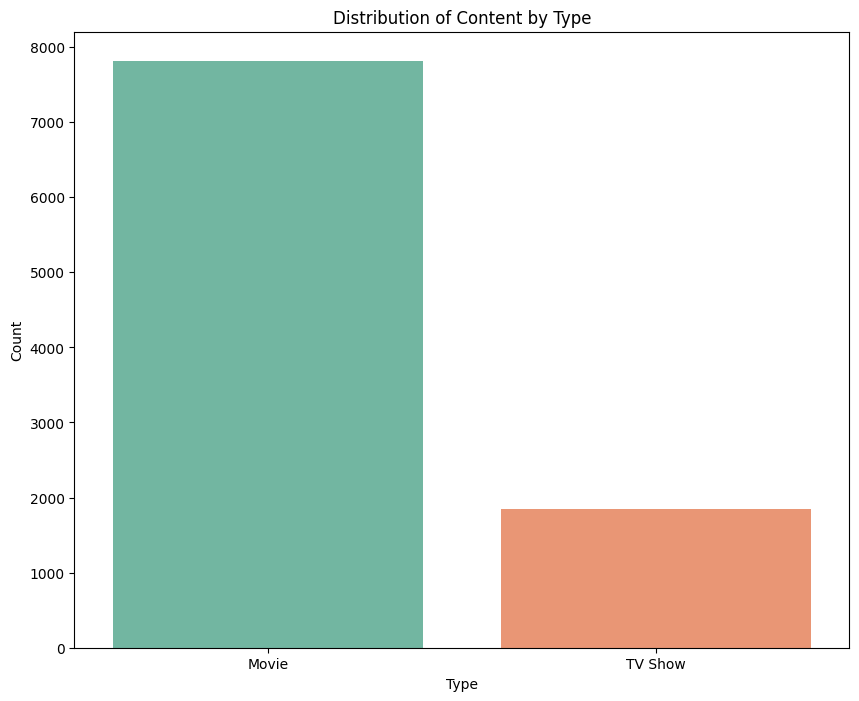

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=type_counts.index, y=type_counts.values,
palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [ ]:
u_df['genres'] = u_df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(u_df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

<ipython-input-111-577009fbd7e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_df['genres'] = u_df['listed_in'].apply(lambda x: x.split(','))


<ipython-input-112-42584c05e803>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,


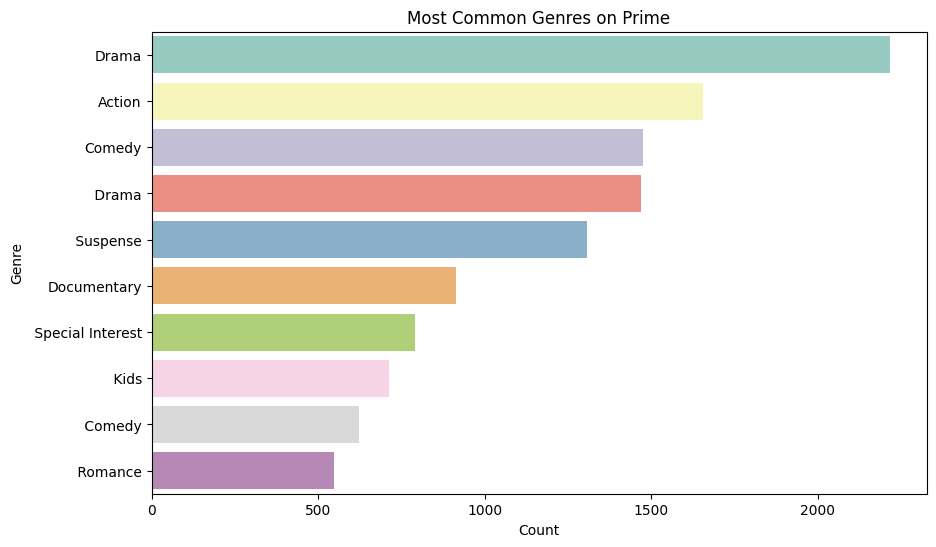

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette='Set3')
plt.title('Most Common Genres on Prime')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
u_df['type'].value_counts()

,count
type,
Movie,7814
TV Show,1854


In [ ]:
# Instead of dropping columns with missing values, try filling them with a placeholder like 'Not Rated'.
u_df = df.fillna({'rating': 'Not Rated'})

# Now you can access the 'rating' column:
u_df['rating'].value_counts()

,count
rating,
13+,1737
16+,1219
18+,1068
R,990
ALL,547
PG-13,382
Not Rated,306
PG,243
7+,237


Text(0.5, 0.98, 'Rating on Prime')

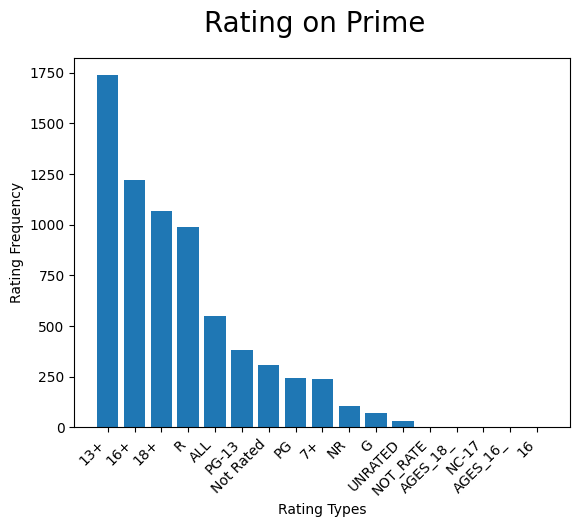

In [ ]:
ratings=u_df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Prime', fontsize=20)

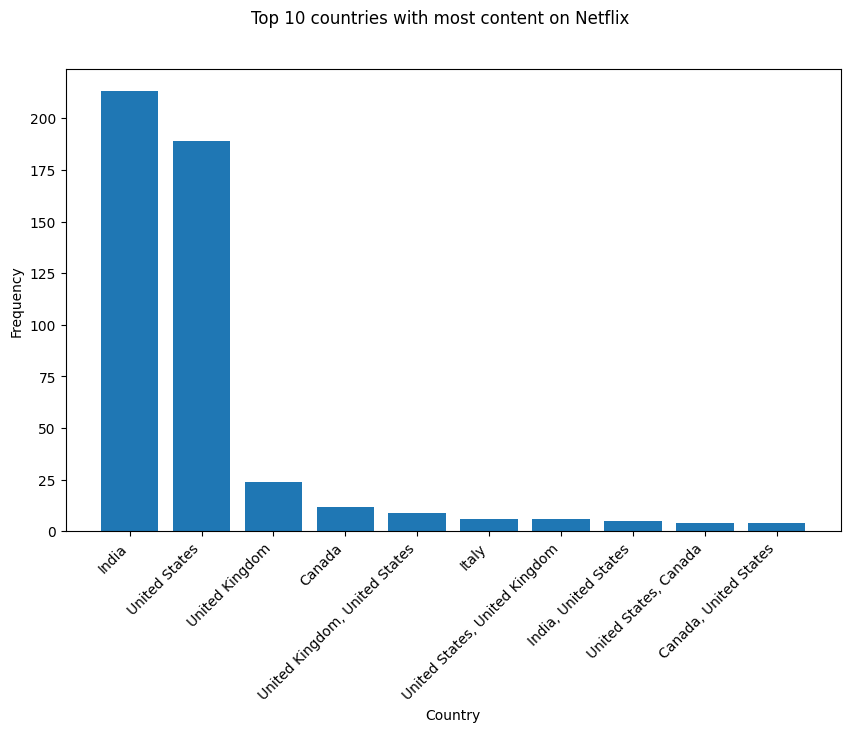

In [ ]:
top_ten_countries=u_df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()